# Description of the dataset

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

# Tasks

The goal is to practice python (especially pandas and matplotlib) via a dataset analysis. Here are some guidelines but feel free to investigate more:
* investigate dataset info (nrows, columns type etc)
* drop columns with more than 9% missing values
* remove show_id column
* create some plots and compute statistics to answer the following questions
    * are there more movies or TV shows ?
    * how many different genres are there ? what are the 2 most popular and 2 least popular ?
    * what are the 3 countries producing the more movies ?
    * same questions for TV shows ?
    * Are there more movies/tv shows from the 2000's than from the 1990's ?
    * what is the average duration of all movies ? what is the longest film ?
    * which tv shows have more than 10 seasons ? or only 1 season ?
    * is there a correlation between the rating and the movie duration ?
    * show number of movies per release year
* we haven't seen how to manipulate dates in the previous courses, but you can try to answer these questions too:
    * show evolution of number of items on netflix per date
    * same but movies and tv shows as separate curves
    * are there some months where more movies/tv shows are added ?
 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import & cleaning

In [4]:
df = pd.read_csv("netflix_titles.csv", parse_dates=["date_added"])
shape_i = df.shape
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null datetime64[ns]
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.5+ KB


In [33]:
df.isna().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.315849
cast            0.091434
country         0.076355
date_added      0.001765
release_year    0.000000
rating          0.001604
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

In [5]:
to_drop = df.columns[df.isna().mean() > 0.09].values.tolist()
to_drop

['director', 'cast']

In [6]:
df = df.drop(to_drop + ["show_id"], axis=1)
df.head(3)

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [7]:
df[["country", "rating"]] = df[["country", "rating"]].fillna("missing")
df = df.dropna(subset=["date_added"])
shape_f = df.shape

In [8]:
print("initial shape = ", shape_i)
print("final shape = ", shape_f)
df.head(3)

initial shape =  (6234, 12)
final shape =  (6223, 9)


,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [9]:
x = df["country"].value_counts()
x[x>150]

United States     2026
India              777
missing            474
United Kingdom     347
Japan              175
Name: country, dtype: int64

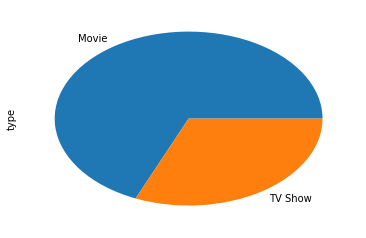

In [10]:
df["type"].value_counts().plot.pie()

In [12]:
df[(df.release_year > 2000) & (df.release_year <= 2010)].head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
12,Movie,Krish Trish and Baltiboy,missing,2017-09-08,2009,TV-Y7,58 min,Children & Family Movies,"A team of minstrels, including a monkey, cat a..."
17,Movie,Krish Trish and Baltiboy: Part II,missing,2017-09-08,2010,TV-Y7,58 min,Children & Family Movies,Animal minstrels narrate stories about a monke...
46,Movie,Bangkok Traffic (Love) Story,Thailand,2018-09-05,2009,TV-14,126 min,"Comedies, International Movies, Romantic Movies",After an encounter with an engineer working th...
49,Movie,Phobia 2,Thailand,2018-09-05,2009,TV-MA,125 min,"Horror Movies, International Movies",From disfiguring punishments to festering soul...
50,Movie,Shutter,Thailand,2018-09-05,2004,TV-MA,96 min,"Horror Movies, International Movies",After killing a young girl in a hit-and-run ac...


In [13]:
series = df[df["type"] == "TV Show"].copy()

In [17]:
series["num_seasons"] = series["duration"].str[:2]

## Plots

In [18]:
timeseries = df[["date_added", "type"]].copy()
ts = timeseries.set_index("date_added")
ts.head()

,type
date_added,
2019-09-09,Movie
2016-09-09,Movie
2018-09-08,TV Show
2018-09-08,TV Show
2017-09-08,Movie


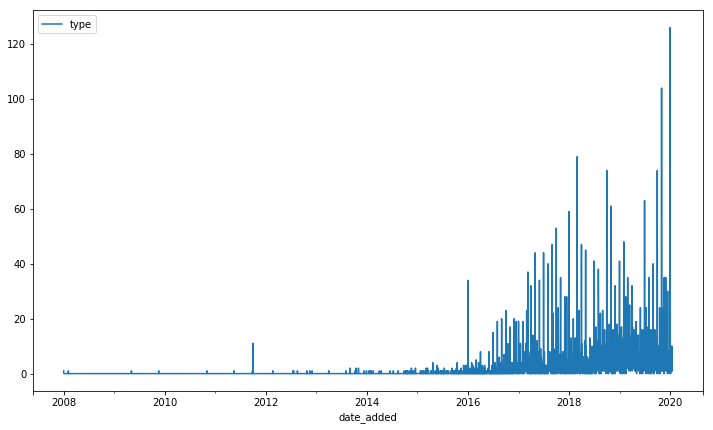

In [23]:
ts.resample('D').count().plot(figsize=(12,7))

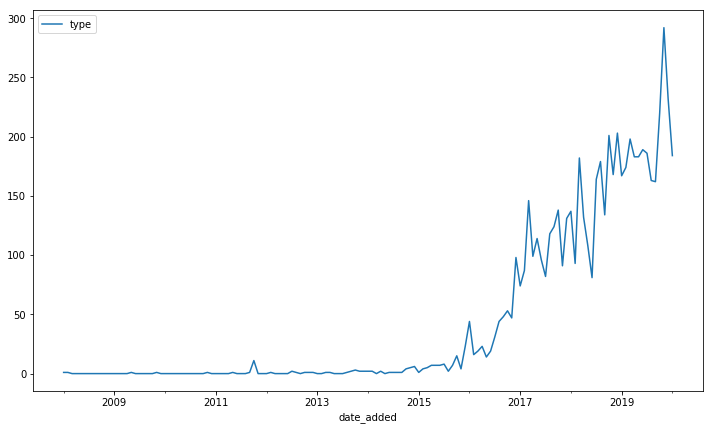

In [24]:
ts.resample('M').count().plot(figsize=(12,7))

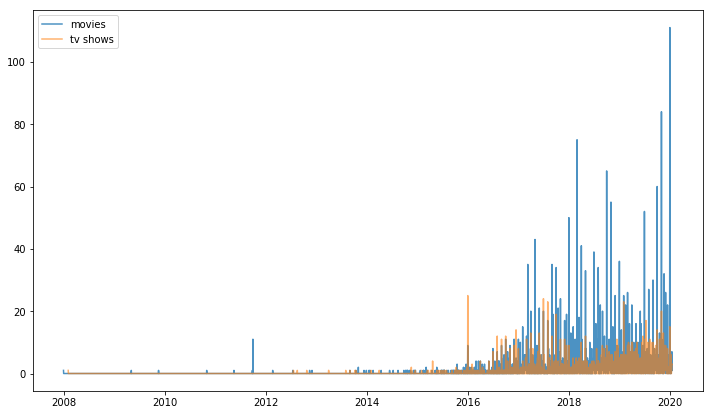

In [30]:
tvshows = df[df["type"] == "TV Show"][["date_added", "type"]].copy().set_index("date_added")
movies = df[df["type"] == "Movie"][["date_added", "type"]].copy().set_index("date_added")

tvshows.columns = ["tv-show"]
movies.columns = ["movie"]

ts1 = tvshows.resample('D').count()
ts2 = movies.resample('D').count()

plt.figure(figsize=(12,7))
plt.plot(ts2, alpha=0.8, label="movies")
plt.plot(ts1, alpha = 0.6, label="tv shows")
plt.legend()

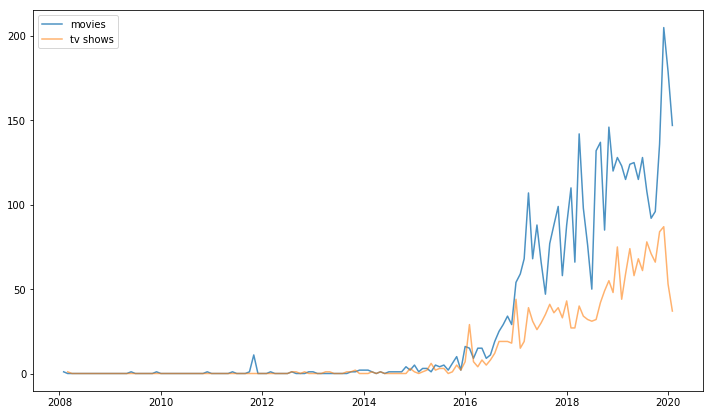

In [49]:
ts1 = tvshows.resample('M').count()
ts2 = movies.resample('M').count()

plt.figure(figsize=(12,7))
plt.plot(ts2, alpha=0.8, label="movies")
plt.plot(ts1, alpha = 0.6, label="tv shows")
plt.legend()

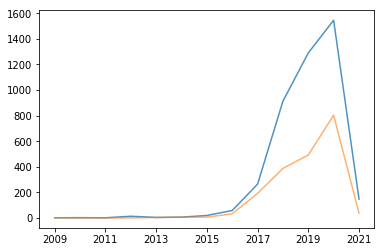

In [70]:
ts1 = tvshows.resample('Y').count()
ts2 = movies.resample('Y').count()

plt.plot(ts2, alpha=0.8)
plt.plot(ts1, alpha = 0.6)

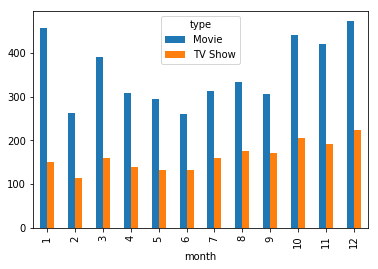

In [94]:
subset = df[["date_added", "type"]].copy()
subset["month"] = subset["date_added"].dt.month

pd.crosstab(subset.month, subset.type).plot(kind="bar")